# <center> R2.08 - Statistique descriptive <br> TP 1 bis - Description unidimensionnelle </center>

<center> A. Ridard </center>

L'objectif est de reprendre le TP1, mais avec Python cette fois !

**Deux documents pouvant être utiles :**
-  [<font style="color:blue">Une (très) courte introduction à Python</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Intro_Python.pdf)
- [<font style="color:blue">Un aide-mémoire complet</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Memento_Pointal.pdf)

**La référence présentée en cours :** 
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

## Importations pour ce TP

In [44]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

> Charger les données du fichier **TP1_Data.xslx** dans un DataFrame.

In [45]:
# importation du fichier Excel

df = pd.read_excel("./TP1_Data.xlsx", sheet_name="Réponses au formulaire 1")

## Représentations graphiques

*Pour établir les différentes distributions, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) équivalente au regroupement en SQL.*

**Représenter graphiquement**, avec le diagramme le plus adapté (cf. section 5 du livre), la **distribution** :

> des trois spécialités

In [46]:
# Tableau
df.groupby("specialite_ensibs")[["id_etudiant"]].count()

,id_etudiant
specialite_ensibs,
CyberData,15
CyberDef,52
CyberLog,26


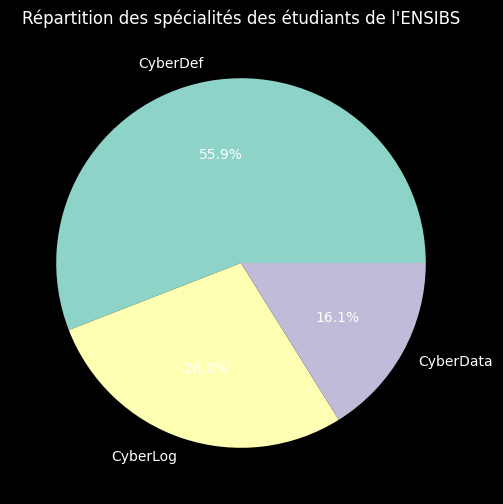

In [47]:
# Graphique

plt.figure(figsize=(8, 6))
df["specialite_ensibs"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Répartition des spécialités des étudiants de l'ENSIBS")
plt.ylabel("")
plt.show()


> des bacs **toute spécialité confondue**

In [48]:
# Tableau

df.groupby(["specialite_ensibs", "bac"])[["id_etudiant"]].count().unstack()

id_etudiant                                 
bac                    Bac ES Bac Pro Bac S Bac STHR Bac STI2D
specialite_ensibs                                             
CyberData                 1.0     NaN  14.0      NaN       NaN
CyberDef                  NaN     3.0  42.0      1.0       6.0
CyberLog                  1.0     NaN  24.0      NaN       1.0

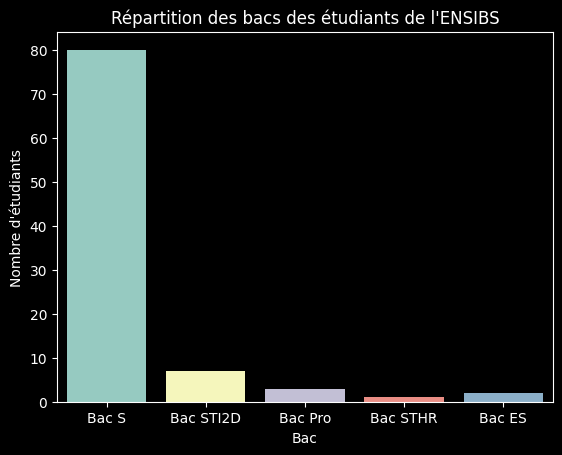

In [49]:
# Graphique

sns.countplot(x="bac", data=df)
plt.title("Répartition des bacs des étudiants de l'ENSIBS")
plt.xlabel("Bac")
plt.ylabel("Nombre d'étudiants")
plt.show()

> des bacs pour chacune des spécialités

In [50]:
# Tableau

df.groupby("specialite_ensibs")[["bac"]].count()

,bac
specialite_ensibs,
CyberData,15
CyberDef,52
CyberLog,26


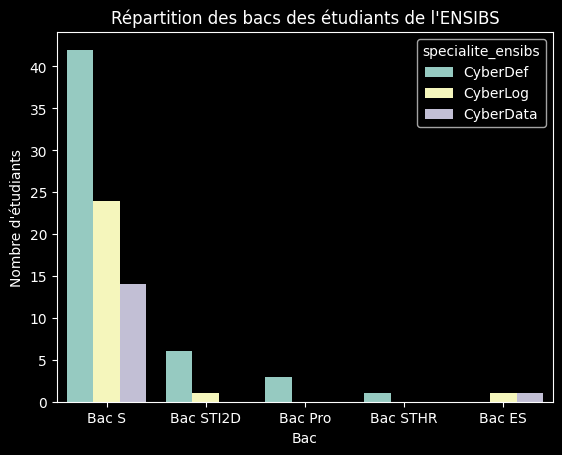

In [51]:
# Graphique

sns.countplot(x="bac", hue="specialite_ensibs", data=df)
plt.title("Répartition des bacs des étudiants de l'ENSIBS")
plt.xlabel("Bac")
plt.ylabel("Nombre d'étudiants")
plt.show()

> des mentions **au bac S**

In [52]:
# Tableau

mention_order = ["Passable", "Assez bien", "Bien", "Très bien"]

df[df["bac"] == "Bac S"].groupby("mention_bac")[["id_etudiant"]].count().reindex(mention_order)

,id_etudiant
mention_bac,
Passable,8
Assez bien,37
Bien,27
Très bien,8


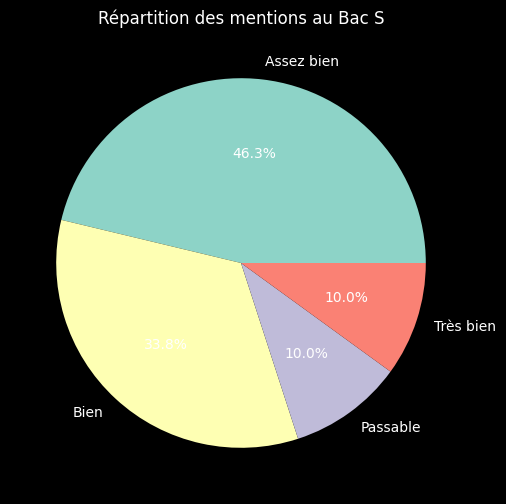

In [53]:
# Graphique

plt.figure(figsize=(8, 6))
df[df["bac"] == "Bac S"]["mention_bac"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Répartition des mentions au Bac S")
plt.ylabel("")
plt.show()

> des mentions **au bac S** pour chacune des spécialités

In [54]:
# Tableau

df[df["bac"] == "Bac S"].groupby(["mention_bac", "specialite_ensibs"])[["id_etudiant"]].count().unstack().reindex(index=["Passable", "Assez bien", "Bien", "Très bien"])


id_etudiant                  
specialite_ensibs   CyberData CyberDef CyberLog
mention_bac                                    
Passable                    1        5        2
Assez bien                  8       16       13
Bien                        4       16        7
Très bien                   1        5        2

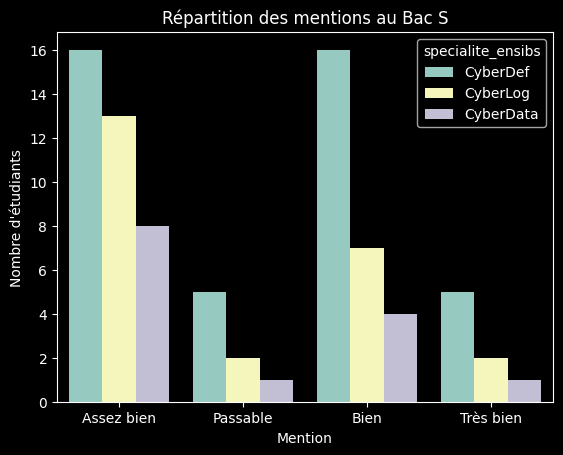

In [55]:
# Graphique

sns.countplot(x="mention_bac", hue="specialite_ensibs", data=df[df["bac"] == "Bac S"])
plt.title("Répartition des mentions au Bac S")
plt.xlabel("Mention")
plt.ylabel("Nombre d'étudiants")
plt.show()

> des formations postbac

In [56]:
# Tableau

df.groupby("postbac")[["id_etudiant"]].count()

,id_etudiant
postbac,
Autre,11
DUT INFO,36
DUT R&T,23
Prépa concours (CPGE),14
Prépa intégrée (PEI),9


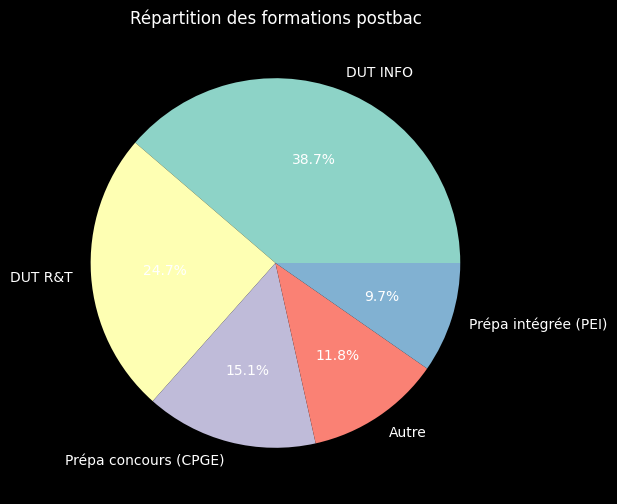

In [57]:
# Graphique

plt.figure(figsize=(8, 6))
df["postbac"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Répartition des formations postbac")
plt.ylabel("")
plt.show()


> des formations postbac pour chacune des spécialités

In [58]:
# Tableau

df.groupby(["specialite_ensibs", "postbac"])[["id_etudiant"]].count().unstack()

id_etudiant                                          
postbac                 Autre DUT INFO DUT R&T Prépa concours (CPGE)   
specialite_ensibs                                                      
CyberData                 4.0      7.0     2.0                   NaN  \
CyberDef                  4.0     23.0    20.0                   1.0   
CyberLog                  3.0      6.0     1.0                  13.0   

                                        
postbac           Prépa intégrée (PEI)  
specialite_ensibs                       
CyberData                          2.0  
CyberDef                           4.0  
CyberLog                           3.0

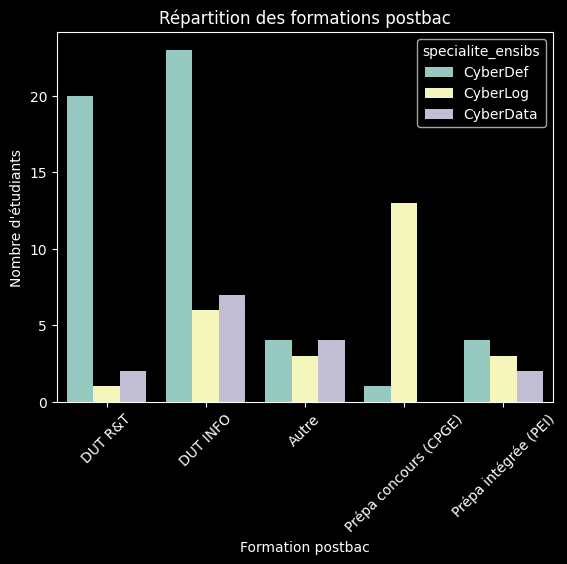

In [59]:
# Graphique

sns.countplot(x="postbac", hue="specialite_ensibs", data=df)
plt.title("Répartition des formations postbac")
plt.xlabel("Formation postbac")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.show()

> des formations postbac pour chacune des mentions **au bac S**

In [60]:
# Tableau

df[df["bac"] == "Bac S"].groupby(["mention_bac", "postbac"]).size().unstack()

postbac,Autre,DUT INFO,DUT R&T,Prépa concours (CPGE),Prépa intégrée (PEI)
mention_bac,,,,,
Assez bien,6.0,12.0,11.0,5.0,3.0
Bien,NaN,14.0,2.0,6.0,5.0
Passable,2.0,3.0,3.0,NaN,NaN
Très bien,1.0,3.0,1.0,2.0,1.0


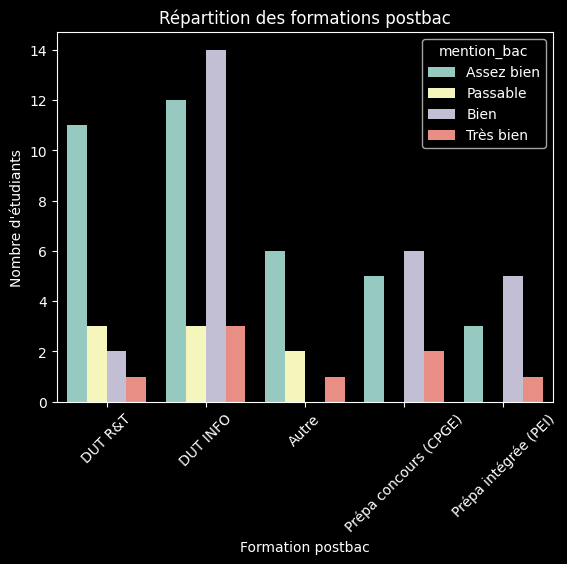

In [61]:
# Graphique

sns.countplot(x="postbac", hue="mention_bac", data=df[df["bac"] == "Bac S"])
plt.title("Répartition des formations postbac")
plt.xlabel("Formation postbac")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.show()

> des départements du lycée

In [62]:
# Tableau

df.groupby("dpt_lycee")[["id_etudiant"]].count()

,id_etudiant
dpt_lycee,
6,1
7,1
14,3
22,7
26,2
28,1
29,5
30,1
32,1


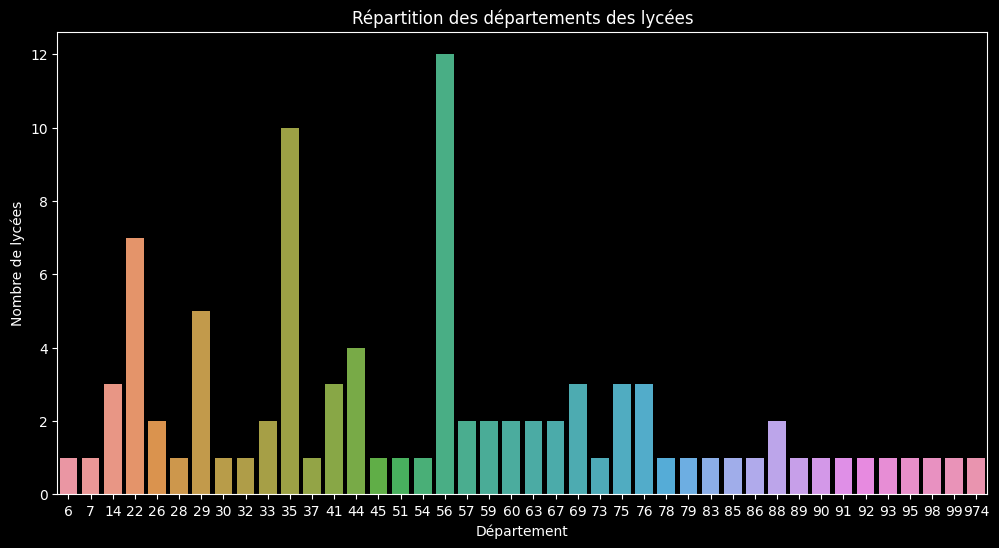

In [63]:
# Graphique

plt.figure(figsize=(12, 6))
sns.countplot(x="dpt_lycee", data=df)
plt.title("Répartition des départements des lycées")
plt.xlabel("Département")
plt.ylabel("Nombre de lycées")
plt.show()



> des étudiants qui n'ont pas changé de département pour leur formation postbac

In [64]:
# Tableau

df[df['dpt_lycee'] == df['dpt_postbac']].groupby('dpt_lycee')[['id_etudiant']].count()



,id_etudiant
dpt_lycee,
14,3
22,5
26,1
33,1
35,6
37,1
41,1
44,3
54,1


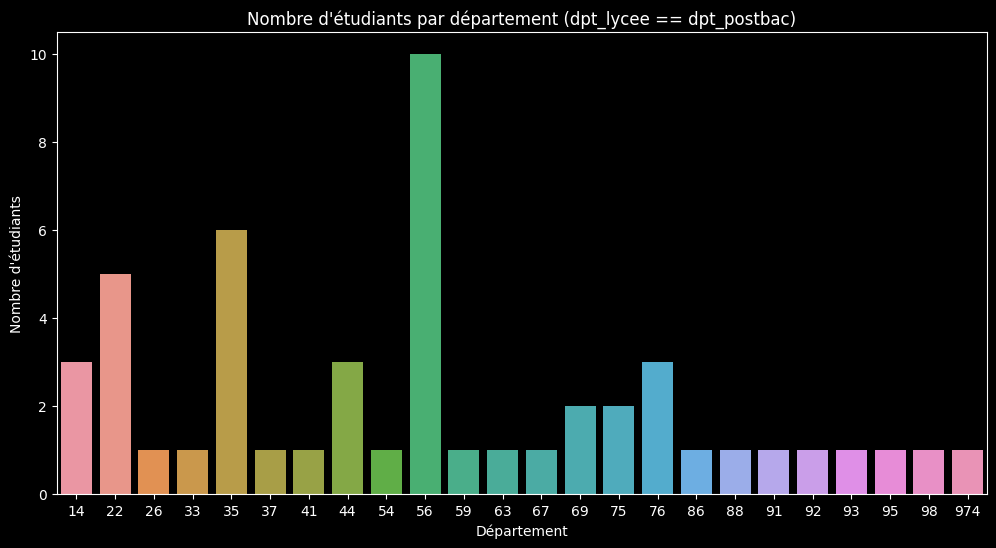

In [65]:
# Graphique

plt.figure(figsize=(12, 6))
sns.countplot(x='dpt_lycee', data=df[df['dpt_lycee'] == df['dpt_postbac']])
plt.title("Nombre d'étudiants par département (dpt_lycee == dpt_postbac)")
plt.xlabel("Département")
plt.ylabel("Nombre d'étudiants")
plt.show()


> des notes de maths au bac

In [66]:
# Tableau

note_order = ["Entre 4 et 8 (exclus)", "Entre 8 et 10 (exclus)", "Entre 10 et 12 (exclus)", "Entre 12 et 14 (exclus)", "Entre 14 et 16 (exclus)", "Entre 16 et 18 (exclus)", "Entre 18 et 20"]

df.groupby("note_maths_bac")[["id_etudiant"]].count().reindex(note_order)

,id_etudiant
note_maths_bac,
Entre 4 et 8 (exclus),2
Entre 8 et 10 (exclus),4
Entre 10 et 12 (exclus),14
Entre 12 et 14 (exclus),20
Entre 14 et 16 (exclus),27
Entre 16 et 18 (exclus),16
Entre 18 et 20,10


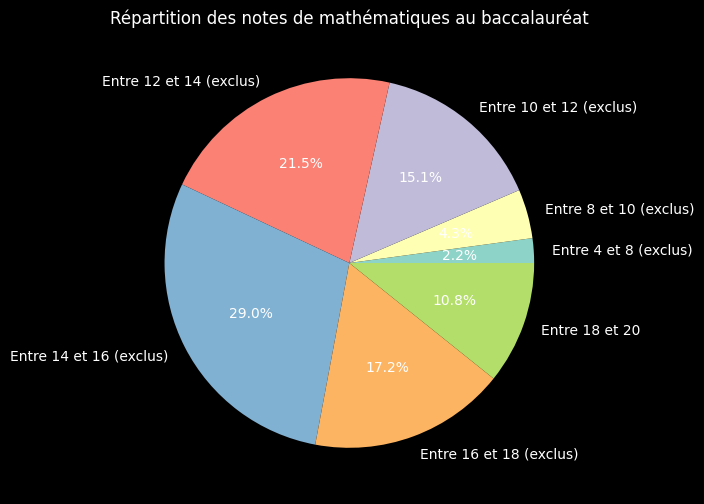

In [90]:
# Graphique

plt.figure(figsize=(8, 6))
df["note_maths_bac"].value_counts().reindex(note_order).plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition des notes de mathématiques au baccalauréat")
plt.ylabel("")
plt.show()

> des notes de maths au bac pour chacune des spécialités

In [68]:
# Tableau

df.groupby("specialite_ensibs")["note_maths_bac"].value_counts().unstack().reindex(columns=note_order)

note_maths_bac,Entre 4 et 8 (exclus),Entre 8 et 10 (exclus),Entre 10 et 12 (exclus),Entre 12 et 14 (exclus),Entre 14 et 16 (exclus),Entre 16 et 18 (exclus),Entre 18 et 20
specialite_ensibs,,,,,,,
CyberData,NaN,1.0,2.0,2.0,4.0,3.0,3.0
CyberDef,1.0,3.0,7.0,10.0,18.0,9.0,4.0
CyberLog,1.0,NaN,5.0,8.0,5.0,4.0,3.0


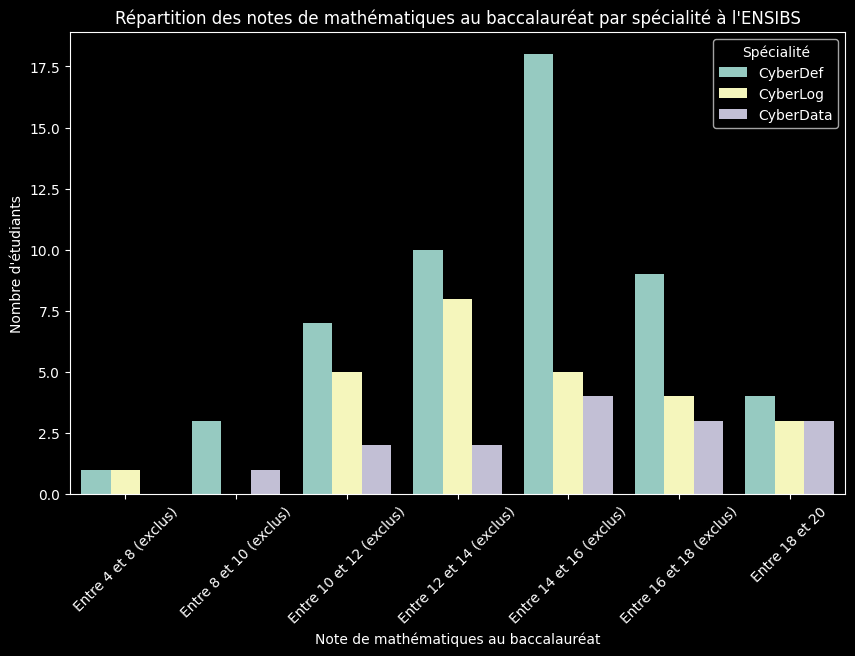

In [69]:
# Graphique

plt.figure(figsize=(10, 6))
sns.countplot(x='note_maths_bac', hue='specialite_ensibs', data=df)
plt.title("Répartition des notes de mathématiques au baccalauréat par spécialité à l'ENSIBS")
plt.xlabel("Note de mathématiques au baccalauréat")
plt.ylabel("Nombre d'étudiants")
plt.legend(title='Spécialité')
plt.xticks(rotation=45)
plt.show()


> des notes de protocoles en cryptographie

In [70]:
# Tableau

df.groupby("gpa_protocoles_crypto")[["id_etudiant"]].count()

,id_etudiant
gpa_protocoles_crypto,
0.00,1
2.00,2
2.30,1
2.50,1
3.00,26
3.05,1
3.10,2
3.15,2
3.20,5


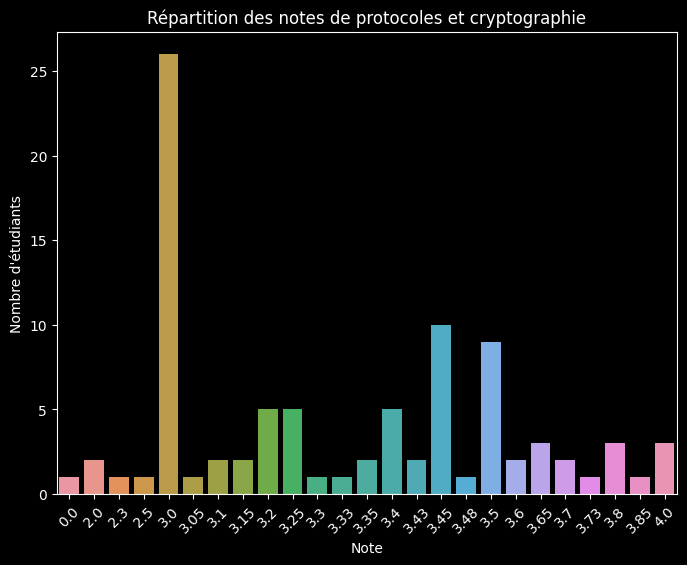

In [71]:
# Graphique

plt.figure(figsize=(8, 6))
sns.countplot(x="gpa_protocoles_crypto", data=df)
plt.title("Répartition des notes de protocoles et cryptographie")
plt.xlabel("Note")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.show()

> des notes de protocoles en cryptographie pour chacune des spécialités

In [72]:
# Tableau

df.groupby(["specialite_ensibs", "gpa_protocoles_crypto"])[["id_etudiant"]].count().unstack()

id_etudiant                                            
gpa_protocoles_crypto        0.00 2.00 2.30 2.50  3.00 3.05 3.10 3.15 3.20   
specialite_ensibs                                                            
CyberData                     1.0  NaN  NaN  NaN  10.0  NaN  NaN  1.0  2.0  \
CyberDef                      NaN  1.0  1.0  1.0  10.0  NaN  2.0  NaN  3.0   
CyberLog                      NaN  1.0  NaN  NaN   6.0  1.0  NaN  1.0  NaN   

                            ...                                                 
gpa_protocoles_crypto 3.25  ...  3.45 3.48 3.50 3.60 3.65 3.70 3.73 3.80 3.85   
specialite_ensibs           ...                                                 
CyberData              NaN  ...   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  \
CyberDef               5.0  ...  10.0  NaN  6.0  2.0  1.0  NaN  NaN  NaN  NaN   
CyberLog               NaN  ...   NaN  1.0  2.0  NaN  2.0  2.0  1.0  3.0  1.0   

                            
gpa_protocoles_crypto 4.00  
specialite_ensibs           
CyberData              NaN  
CyberDef               3.0  
CyberLog               NaN  

[3 rows x 25 columns]

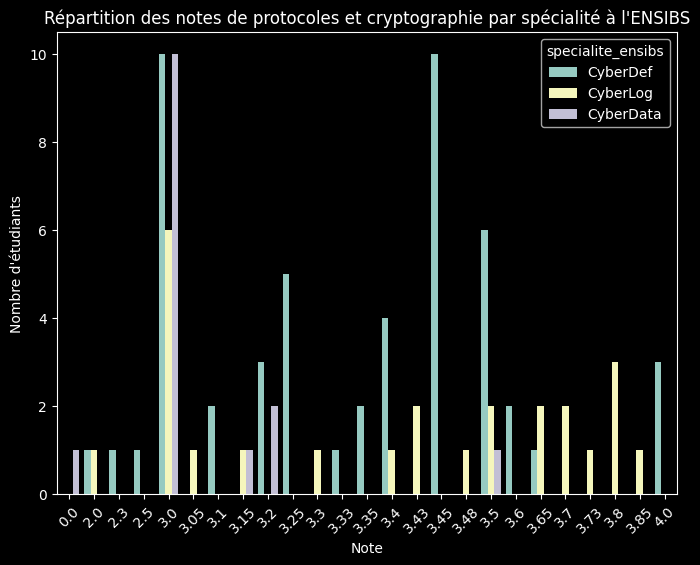

In [73]:
# Graphique

plt.figure(figsize=(8, 6))
sns.countplot(x="gpa_protocoles_crypto", hue="specialite_ensibs", data=df)
plt.title("Répartition des notes de protocoles et cryptographie par spécialité à l'ENSIBS")
plt.xlabel("Note")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.show()

> des notes de protocoles en cryptographie pour chacune des formations postbac

In [74]:
# Tableau

df.groupby(["postbac", "gpa_protocoles_crypto"])[["id_etudiant"]].count().unstack()

id_etudiant                                            
gpa_protocoles_crypto        0.00 2.00 2.30 2.50  3.00 3.05 3.10 3.15 3.20   
postbac                                                                      
Autre                         NaN  NaN  NaN  NaN   6.0  NaN  NaN  NaN  NaN  \
DUT INFO                      1.0  1.0  NaN  1.0  10.0  NaN  NaN  NaN  2.0   
DUT R&T                       NaN  NaN  1.0  NaN   6.0  NaN  1.0  NaN  2.0   
Prépa concours (CPGE)         NaN  1.0  NaN  NaN   1.0  1.0  NaN  1.0  1.0   
Prépa intégrée (PEI)          NaN  NaN  NaN  NaN   3.0  NaN  1.0  1.0  NaN   

                            ...                                                
gpa_protocoles_crypto 3.25  ... 3.45 3.48 3.50 3.60 3.65 3.70 3.73 3.80 3.85   
postbac                     ...                                                
Autre                  NaN  ...  1.0  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN  \
DUT INFO               3.0  ...  5.0  NaN  3.0  1.0  NaN  1.0  NaN  1.0  NaN   
DUT R&T                NaN  ...  4.0  NaN  4.0  NaN  1.0  NaN  NaN  NaN  NaN   
Prépa concours (CPGE)  NaN  ...  NaN  1.0  NaN  NaN  1.0  1.0  1.0  2.0  1.0   
Prépa intégrée (PEI)   2.0  ...  NaN  NaN  1.0  NaN  1.0  NaN  NaN  NaN  NaN   

                            
gpa_protocoles_crypto 4.00  
postbac                     
Autre                  NaN  
DUT INFO               1.0  
DUT R&T                2.0  
Prépa concours (CPGE)  NaN  
Prépa intégrée (PEI)   NaN  

[5 rows x 25 columns]

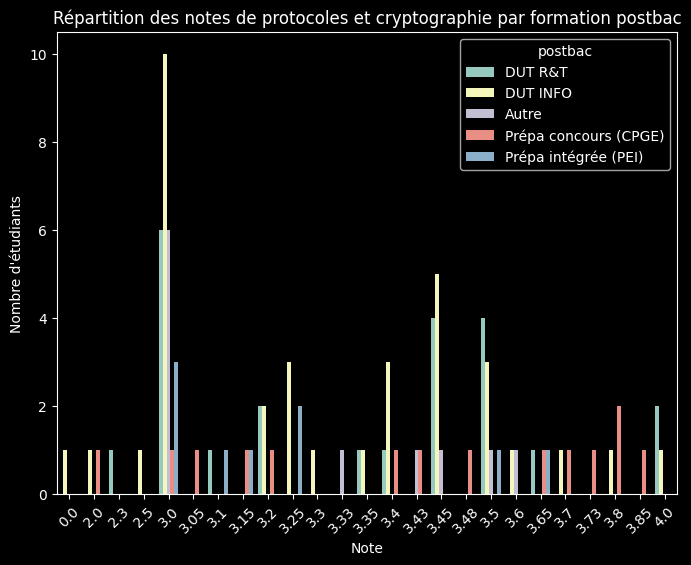

In [75]:
# Graphique

plt.figure(figsize=(8, 6))
sns.countplot(x="gpa_protocoles_crypto", hue="postbac", data=df)
plt.title("Répartition des notes de protocoles et cryptographie par formation postbac")
plt.xlabel("Note")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.show()

## Indicateurs statistiques

*Là encore, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) accompagnée de **.agg()**.*

**Calculer** :

> le nombre d'étudiants pour chacune des spécialités

In [76]:
df.groupby("specialite_ensibs")[["id_etudiant"]].count()

,id_etudiant
specialite_ensibs,
CyberData,15
CyberDef,52
CyberLog,26


> la moyenne et l'écart-type des notes de protocoles en cryptographie

In [77]:
moyenne = df["gpa_protocoles_crypto"].mean()
ecart_type = df["gpa_protocoles_crypto"].std()

print("Moyenne : ", moyenne, "\nEcart-type : ", ecart_type)

Moyenne :  3.2369565217391307 
Ecart-type :  0.4963199498250722


> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des spécialités

In [78]:
df.groupby("specialite_ensibs")["gpa_protocoles_crypto"].agg(["mean", "std"])

,mean,std
specialite_ensibs,,
CyberData,2.870000,0.806181
CyberDef,3.285192,0.360405
CyberLog,3.356800,0.417978


> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des formations postbac

In [79]:
df.groupby("postbac")["gpa_protocoles_crypto"].agg(["mean", "std"])

,mean,std
postbac,,
Autre,3.210000,0.249239
DUT INFO,3.152857,0.656298
DUT R&T,3.304348,0.367087
Prépa concours (CPGE),3.374286,0.490443
Prépa intégrée (PEI),3.211111,0.231541


> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto

In [80]:
df.groupby("specialite_ensibs")["gpa_maths_crypto"].agg(["min", "max"])

,min,max
specialite_ensibs,,
CyberData,0.0,4.0
CyberDef,0.0,4.0
CyberLog,0.0,4.0


> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des spécialités

In [81]:
df.groupby("specialite_ensibs")["gpa_maths_crypto"].agg(["min", "max", "mean", "std"])

,min,max,mean,std
specialite_ensibs,,,,
CyberData,0.0,4.0,2.000000,1.732051
CyberDef,0.0,4.0,2.958269,1.034335
CyberLog,0.0,4.0,2.903846,1.216711


> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des formations postbac

In [82]:
df.groupby("postbac")["gpa_maths_crypto"].agg(["min", "max", "mean", "std"])

,min,max,mean,std
postbac,,,,
Autre,0.0,4.0,2.545455,1.368476
DUT INFO,0.0,4.0,2.606389,1.254426
DUT R&T,0.0,4.0,2.782609,1.312753
Prépa concours (CPGE),0.0,4.0,2.928571,1.356709
Prépa intégrée (PEI),3.0,4.0,3.611111,0.333333


> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac

In [83]:
moyenne = df["note_maths_bac_approchee"].mean()
ecart_type = df["note_maths_bac_approchee"].std()

print("Moyenne : ", moyenne, "\nEcart-type : ", ecart_type)

Moyenne :  14.311827956989248 
Ecart-type :  2.937680594351146


> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac pour chacune des spécialités

In [84]:
df.groupby("specialite_ensibs")["note_maths_bac_approchee"].agg(["mean", "std"])

,mean,std
specialite_ensibs,,
CyberData,15.000000,3.116775
CyberDef,14.250000,2.855164
CyberLog,14.038462,3.052616


## Des questions supplémentaires (non facultatives)

*Pour les questions suivantes, on pourra se reporter à la section 4.4 du livre*

> Afficher les différents indicateurs, à l'aide de la méthode **.describe()**, pour les notes de protocoles en crypto et celles de maths pour la crypto

In [85]:
df.groupby("specialite_ensibs")[["gpa_protocoles_crypto", "gpa_maths_crypto"]].describe()

gpa_protocoles_crypto                                   
                                  count      mean       std  min    25%   
specialite_ensibs                                                         
CyberData                          15.0  2.870000  0.806181  0.0  3.000  \
CyberDef                           52.0  3.285192  0.360405  2.0  3.075   
CyberLog                           25.0  3.356800  0.417978  2.0  3.000   

                                      gpa_maths_crypto                       
                     50%    75%   max            count      mean       std   
specialite_ensibs                                                            
CyberData          3.000  3.075  3.50             15.0  2.000000  1.732051  \
CyberDef           3.375  3.450  4.00             52.0  2.958269  1.034335   
CyberLog           3.430  3.700  3.85             26.0  2.903846  1.216711   

                                                
                   min     25%   50%  75%  max  
specialite_ensibs                               
CyberData          0.0  0.0000  3.00  3.5  4.0  
CyberDef           0.0  2.9375  3.00  3.5  4.0  
CyberLog           0.0  2.6250  3.25  3.5  4.0

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des spécialités

In [86]:
df.groupby("specialite_ensibs")["gpa_protocoles_crypto"].describe()

,count,mean,std,min,25%,50%,75%,max
specialite_ensibs,,,,,,,,
CyberData,15.0,2.870000,0.806181,0.0,3.000,3.000,3.075,3.50
CyberDef,52.0,3.285192,0.360405,2.0,3.075,3.375,3.450,4.00
CyberLog,25.0,3.356800,0.417978,2.0,3.000,3.430,3.700,3.85


> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des formations postbac en se restreignant à CyberDef

In [87]:
df[df["specialite_ensibs"] == "CyberDef"].groupby("postbac")["gpa_protocoles_crypto"].describe()

,count,mean,std,min,25%,50%,75%,max
postbac,,,,,,,,
Autre,4.0,3.345000,0.255147,3.0,3.2475,3.390,3.4875,3.60
DUT INFO,23.0,3.267391,0.399889,2.0,3.1250,3.400,3.4500,4.00
DUT R&T,20.0,3.325000,0.379231,2.3,3.0750,3.425,3.5000,4.00
Prépa concours (CPGE),1.0,3.200000,NaN,3.2,3.2000,3.200,3.2000,3.20
Prépa intégrée (PEI),4.0,3.150000,0.122474,3.0,3.0750,3.175,3.2500,3.25


> Afficher le 1er et le 9ème décile, le coefficient d'asymétrie et celui d'applatissement pour les notes de protocoles en crypto

In [88]:
df.groupby("specialite_ensibs")[["gpa_protocoles_crypto"]].quantile([0.1, 0.9])

gpa_protocoles_crypto
specialite_ensibs                           
CyberData         0.1                   3.00
                  0.9                   3.20
CyberDef          0.1                   3.00
                  0.9                   3.59
CyberLog          0.1                   3.00
                  0.9                   3.80